# Calculating Images Color difference

Using [slic](https://pyimagesearch.com/2014/07/28/a-slic-superpixel-tutorial-using-python/) segmentation calculate the [delta_E](https://www.viewsonic.com/library/creative-work/what-is-delta-e-and-why-is-it-important-for-color-accuracy/#:~:text=As%20a%20whole%2C%20the%20term,and%20100%20indicates%20complete%20distortion)

In [1]:
import cv2 as cv
import glob
import os
import PIL
import colour
import math
import numpy as np
import matplotlib.pylab as plt

from PIL import Image
from typing import Callable, Tuple
from skimage.io import imread, imshow
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage.metrics import structural_similarity

%matplotlib inline

In [2]:
# path for the folder that contains the images
path = "../data/preprocess/"
cases = [f.path[19:] for f in os.scandir(path) if f.is_dir()]

# function to open images and return them as a list
def open_images(path: str, case: str, circumstance: str) -> list:
    lst = []
    for filename in glob.glob(path + case + "/" + circumstance + "/*.JPG"):
        lst.append(imread(filename))
    return lst

def segmentation(img) -> np.ndarray:
    '''perform segmentation with slic'''
    image_slic = slic(image=img, n_segments=10, compactness=20)
    return label2rgb(image_slic, img, kind='avg')

def Average(lst):
    return sum(lst) / len(lst)

def compare_hist(lst: list, method: Callable) -> float:
    '''Given a list of histograms, compare them with the desired method and return the average value'''
    A, B, C = lst
    histB = cv.compareHist(A, B, method)
    histC = cv.compareHist(A, C, method)
    return Average([histB, histC])

def convert_number(number: float, range1: Tuple, range2: Tuple) -> int:
    (a, b), (c, d) = range1, range2
    return (c + d) - round(c + (d - c / b - a) * (number - a))


In [3]:
images_before_treatment = open_images(path=path, case='CASE18', circumstance="AFTER")
segmented_images = [segmentation(img) for img in images_before_treatment]

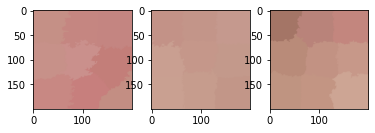

In [4]:
plt.subplot(1, 3, 1)
plt.imshow(segmented_images[0])
plt.subplot(1, 3, 2)
plt.imshow(segmented_images[1])
plt.subplot(1, 3, 3)
plt.imshow(segmented_images[2])
plt.show()

In [5]:
image1_lab = cv.cvtColor(segmented_images[0].astype(np.float32) / 255, cv.COLOR_RGB2Lab)
image2_lab = cv.cvtColor(segmented_images[1].astype(np.float32) / 255, cv.COLOR_RGB2Lab)
image3_lab = cv.cvtColor(segmented_images[2].astype(np.float32) / 255, cv.COLOR_RGB2Lab)

delta_E1 = colour.delta_E(image1_lab, image2_lab)
delta_E2 = colour.delta_E(image1_lab, image3_lab)

print(f'first pair: {np.max(delta_E1)}')
print(f'second pair: {np.max(delta_E2)}')

first pair: 10.900578805931541
second pair: 13.291579214554842
